Davies-Bouldin Index: 1.342184356995347
Silhouette Score: 0.2280834678080386


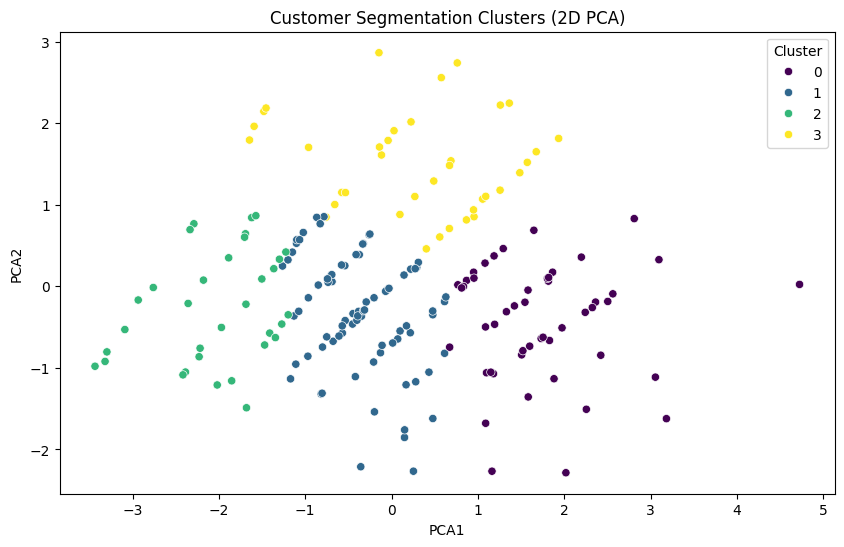

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv("/content/drive/MyDrive/Customers.csv")
transactions = pd.read_csv("/content/drive/MyDrive/Transactions.csv")

# Merge datasets
data = transactions.groupby("CustomerID").agg(
    total_spending=("TotalValue", "sum"),
    purchase_frequency=("TransactionID", "count"),
    avg_transaction_value=("TotalValue", "mean")
).reset_index().merge(customers, on="CustomerID", how="left")

# Preprocess features
numerical_features = ["total_spending", "purchase_frequency", "avg_transaction_value"]
categorical_features = ["Region"]

scaler = StandardScaler()
encoder = OneHotEncoder()

scaled_features = scaler.fit_transform(data[numerical_features])
encoded_features = encoder.fit_transform(data[categorical_features]).toarray()

# Combine processed features
import numpy as np
features = np.hstack([scaled_features, encoded_features])

# Apply K-Means clustering
optimal_clusters = 4  # Adjust this based on metrics
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(features)

# Evaluate clustering
db_index = davies_bouldin_score(features, data['Cluster'])
silhouette_avg = silhouette_score(features, data['Cluster'])

# Print metrics
print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette_avg}")

# Visualize clusters using PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features)
data['PCA1'] = pca_features[:, 0]
data['PCA2'] = pca_features[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title("Customer Segmentation Clusters (2D PCA)")
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')